In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats

import utils
import seaborn as sns 
import seaborn.objects as so
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale


In [11]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/Project/Keio Testing_analysis/src/utils.py'>

# One dot 

In [97]:
filename = utils.Save.savepath('ana_action_plan_dimentionality_redraw', 'one_dot_dim.csv')
df_all = pd.read_csv(filename)

df_all_group = df_all.copy()
df_all_group['dim'] = -df_all_group['dim']
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()

df_all_group = df_all_group.rename(columns={'actual control': 'actual_control', 'angular bias': 'angular_bias'})


df_all_group['actual_control'] = df_all_group['actual_control'].astype('category')
df_all_group['angular_bias'] = df_all_group['angular_bias'].astype('category')


In [13]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [14]:
%R -i df_all_group
%R print(df_all_group)

    group participant actual_control angular_bias       dim
0       H  K-Reg-H-10           0.30            0 0.2387746
1       H  K-Reg-H-10           0.30           90 0.2657181
2       H  K-Reg-H-10           0.55            0 0.2203022
3       H  K-Reg-H-10           0.55           90 0.2906886
4       H  K-Reg-H-10           0.80            0 0.2299819
5       H  K-Reg-H-10           0.80           90 0.3637667
6       H  K-Reg-H-11           0.30            0 0.3032841
7       H  K-Reg-H-11           0.30           90 0.3192226
8       H  K-Reg-H-11           0.55            0 0.2579825
9       H  K-Reg-H-11           0.55           90 0.3051981
10      H  K-Reg-H-11           0.80            0 0.2455797
11      H  K-Reg-H-11           0.80           90 0.3261008
12      H  K-Reg-H-12           0.30            0 0.2351718
13      H  K-Reg-H-12           0.30           90 0.2495796
14      H  K-Reg-H-12           0.55            0 0.2470367
15      H  K-Reg-H-12           0.55    

,group,participant,actual_control,angular_bias,dim
0,H,K-Reg-H-10,0.30,0,0.238775
1,H,K-Reg-H-10,0.30,90,0.265718
2,H,K-Reg-H-10,0.55,0,0.220302
3,H,K-Reg-H-10,0.55,90,0.290689
4,H,K-Reg-H-10,0.80,0,0.229982
...,...,...,...,...,...
295,S,Reg-S-5,0.30,90,0.332415
296,S,Reg-S-5,0.55,0,0.258351
297,S,Reg-S-5,0.55,90,0.293828
298,S,Reg-S-5,0.80,0,0.231179


## Three-way anova

In [15]:
%%R
library(rstatix)
library(emmeans)
library(dplyr)
library(tidyr)
model <- anova_test(df_all_group, dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    between = group,
                    detailed = TRUE)

model
# anova_summary(model)
# emmeans_test(df_all_group, dim~actual_control)

# emmeans(model, ~ actual_control * angular_bias | group, adjust = "tukey")


ANOVA Table (type II tests)

$ANOVA
                             Effect DFn DFd       SSn   SSd        F        p
1                       (Intercept)   1  48 24.328000 0.605 1929.490 2.03e-40
2                             group   1  48  0.040000 0.605    3.162 8.20e-02
3                    actual_control   2  96  0.000989 0.062    0.762 4.70e-01
4                      angular_bias   1  48  0.003000 0.052    2.735 1.05e-01
5              group:actual_control   2  96  0.006000 0.062    4.469 1.40e-02
6                group:angular_bias   1  48  0.001000 0.052    1.057 3.09e-01
7       actual_control:angular_bias   2  96  0.000588 0.033    0.858 4.27e-01
8 group:actual_control:angular_bias   2  96  0.003000 0.033    4.890 1.00e-02
  p<.05      ges
1     * 0.970000
2       0.050000
3       0.001000
4       0.004000
5     * 0.008000
6       0.002000
7       0.000781
8     * 0.004000

$`Mauchly's Test for Sphericity`
                             Effect     W        p p<.05
1                 

## two way-simple anova

### Health group

In [16]:
%%R
model <- anova_test(df_all_group %>% group_by(group), dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    detailed = TRUE)

print("---------------------------------- Health ----------------------------------")
print(model[[1, 2]])



[1] "---------------------------------- Health ----------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd    SSn   SSd        F        p p<.05
1                 (Intercept)   1  24 11.199 0.125 2143.267 5.51e-25     *
2              actual_control   2  48  0.005 0.033    3.903 2.70e-02     *
3                angular_bias   1  24  0.004 0.021    4.517 4.40e-02     *
4 actual_control:angular_bias   2  48  0.003 0.019    4.221 2.00e-02     *
    ges
1 0.983
2 0.026
3 0.019
4 0.017

$`Mauchly's Test for Sphericity`
                       Effect     W        p p<.05
1              actual_control 0.475 0.000191     *
2 actual_control:angular_bias 0.878 0.225000      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.656 1.31, 31.47 0.047         * 0.678
2 actual_control:angular_bias 0.892  1.78, 42.8 0.025         * 0.958
       DF[HF] p[HF] p[HF]<.05
1 1.3

### Patient group

In [17]:
%%R
print("---------------------------------- Patient ---------------------------------")
print(model[[2, 2]])

[1] "---------------------------------- Patient ---------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd       SSn   SSd       F        p p<.05
1                 (Intercept)   1  24 13.169000 0.480 658.709 5.84e-19     *
2              actual_control   2  48  0.001000 0.030   1.206 3.08e-01      
3                angular_bias   1  24  0.000214 0.032   0.163 6.90e-01      
4 actual_control:angular_bias   2  48  0.000578 0.014   1.006 3.73e-01      
       ges
1 0.960000
2 0.003000
3 0.000386
4 0.001000

$`Mauchly's Test for Sphericity`
                       Effect     W     p p<.05
1              actual_control 0.677 0.011     *
2 actual_control:angular_bias 0.964 0.658      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.756 1.51, 36.29 0.300           0.796
2 actual_control:angular_bias 0.966 1.93, 46.35 0.371           1.048
      DF[HF] p[HF] 

## simple main effect

# Plot

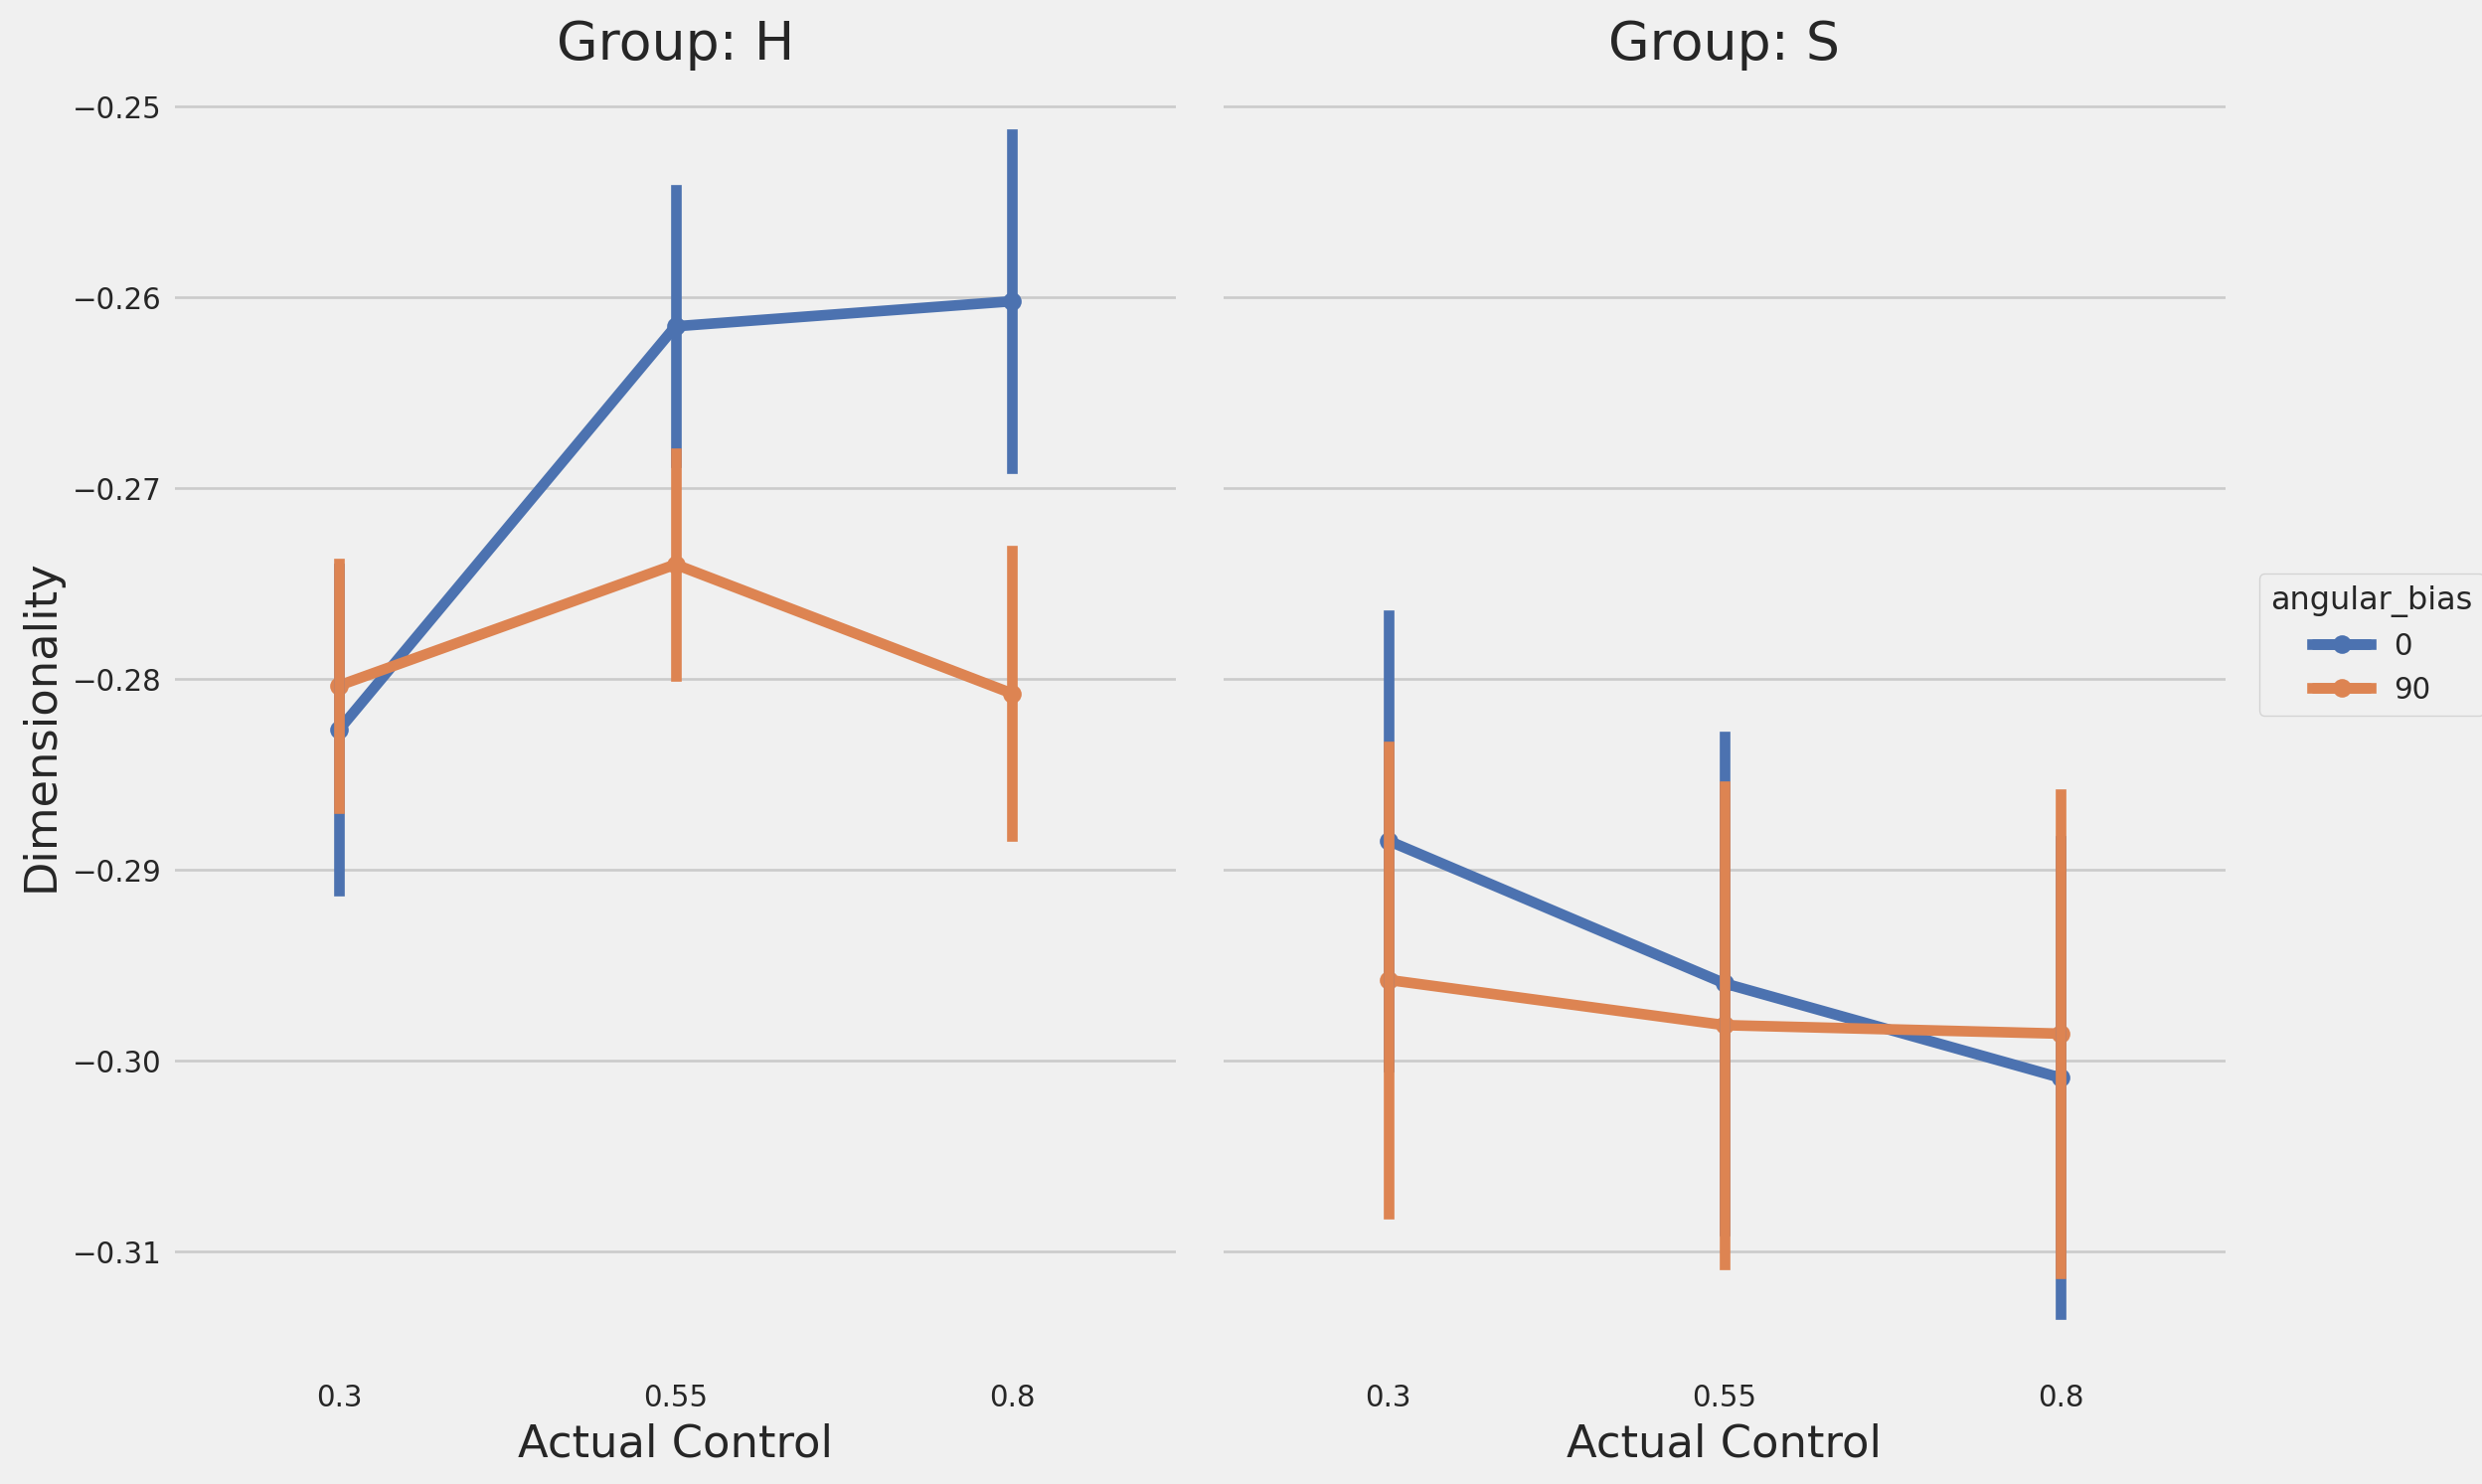

In [119]:
import matplotlib.pyplot as plt
from matplotlib import style 

plt.style.use('default')
p = (
        so.Plot(df_all_group, x="actual_control", y="dim", color="angular_bias")
        .facet("group")
        .add(so.Line(marker="o"), so.Agg())
        .theme({**style.library['fivethirtyeight']})
        .scale(color="deep")
        .add(so.Range(), so.Est(errorbar="se"))
        .layout(size=(12, 8))
        .label(x="Actual Control", y="Dimensionality", col="Group:")
        
    )
# sns.set_style("whitegrid")
p